In [68]:
from src.utils.results_utils import *
from src.utils.data_utils import str_dict_to_values

import numpy as np
import pandas as pd
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA
from sklearn.feature_selection import VarianceThreshold

import plotly.express as px
import geopandas as gpd

from metaphone import doublemetaphone

# Discover characters’ features based on first name

Ajouter intro + dataset presentation

In [ ]:
df_char_cleaned = pd.read_csv('data/cleaned.csv',sep=',')

# Couldn't be done before
df_char_cleaned['Languages'] = df_char_cleaned['Languages'].apply(str_dict_to_values)
df_char_cleaned['Country'] = df_char_cleaned['Country'].apply(str_dict_to_values)
df_char_cleaned['Genres'] = df_char_cleaned['Genres'].apply(str_dict_to_values)

df_char_cleaned.head()

,Wikipedia_ID,Name,Languages,Country,Genres,Character_name,Sex
0,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Akooshay,F
1,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Melanie,F
2,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Williams,M
3,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Jericho,M
4,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Bashira,F


## A. Understanding the Data : Proposing a Hypothesis (Motivation)

We’ll first conduct a preliminary analysis of the dataset to assess if it supports the hypothesis that specific character traits are linked to names. We’ll be starting with an overview of the data and identify trends between names and character features before examining potential causal relationships.

### Name/Movie Genre : 

Expliquer à quoi sert cette partie

In [ ]:
# Apply the fct to reduce the numbers of categories
df_char_cleaned['Genre_Category'] = df_char_cleaned['Genres'].apply(categorize_genre)

frequent_names_m, frequent_names_f = get_top_names_by_genre(df_char_cleaned)
frequent_names_f.head(10)

,Action & Adventure,Drama,Comedy,Horror & Thriller,Fantasy & Sci-Fi,Historical & War,Romance,Documentary,Music & Performance,Cult & B-Movies,Other
0,Sarah,Sarah,Sarah,Sarah,Susan,Elizabeth,Sarah,Elizabeth,Pooja,Sarah,Radha
1,Susan,Helen,Kate,Rachel,Alice,Sarah,Helen,Margaret,Priya,Helen,Rachel
2,Alice,Alice,Julie,Susan,Sarah,Anne,Elizabeth,Helen,Anjali,Kate,Pooja
3,Rachel,Susan,Alice,Alice,Elizabeth,Helen,Julie,Barbara,Tina,Rachel,Priya
4,Lisa,Elizabeth,Susan,Karen,Claire,Margaret,Susan,Marie,Julie,Alice,Shanti
5,Julie,Kate,Helen,Helen,Kate,Marie,Kate,Alice,Sonia,Linda,Neha
6,Kate,Rachel,Elizabeth,Lisa,Lisa,Alice,Alice,Sarah,Radha,Lisa,Sandhya
7,Helen,Julie,Lisa,Kate,Rachel,Catherine,Marie,Dorothy,Anita,Maggie,Frau
8,Elizabeth,Marie,Barbara,Elizabeth,Helen,Charlotte,Maggie,Louise,Sarah,Karen,Nisha
9,Karen,Annie,Rachel,Claire,Linda,Susan,Linda,Anne,Marie,Jennifer,Geeta


In [71]:
frequent_names_m.head(10)

,Action & Adventure,Drama,Comedy,Horror & Thriller,Fantasy & Sci-Fi,Historical & War,Romance,Documentary,Music & Performance,Cult & B-Movies,Other
0,John,John,John,John,John,John,John,John,John,John,John
1,Tom,David,George,Michael,George,William,Paul,George,George,Tom,George
2,James,George,Tom,David,David,George,David,Robert,Paul,David,Christmas
3,David,Tom,Paul,Tom,Tom,Robert,George,William,Vijay,George,Mickey
4,George,Paul,Charlie,Paul,James,Charles,Tom,Charles,Shekhar,Paul,James
5,Michael,James,Michael,James,Michael,Thomas,Michael,David,Charlie,Michael,Tom
6,Robert,Michael,David,Robert,Robert,James,Richard,Richard,Johnny,Charlie,Philip
7,William,Robert,Moe,George,Charlie,David,Robert,James,Rahul,Jim,Richard
8,Jim,Charles,James,Richard,William,Richard,Charlie,Paul,David,James,Robert
9,Paul,William,Richard,Charles,Arthur,Tom,James,Tom,Karan,Steve,Max


In [ ]:
male_count = df_char_cleaned[df_char_cleaned['Sex'] == 'M'].shape[0]
female_count = df_char_cleaned[df_char_cleaned['Sex'] == 'F'].shape[0]

print(f"Number of male names: {male_count}")
print(f"Number of female names: {female_count}")

Number of male names: 98027
Number of female names: 56821


In [31]:
def count_vowels(name):
    return sum(1 for char in name.lower() if char in vowels)

consonants = set('bcdfghjklmnpqrstvwxz')
def count_consonants(name):
    return sum(1 for char in name.lower() if char not in vowels)

kept_names['vowel_count'] = kept_names['Character_name'].apply(count_vowels)
kept_names['consonant_count'] = kept_names['Character_name'].apply(count_consonants)

print('Mean number of vowels in name by sex:')
kept_names.groupby('Sex')['vowel_count'].agg(['mean', 'std'])

Mean number of vowels in name by sex:


,mean,std
Sex,,
F,2.633991,0.827407
M,2.305355,0.890816


In [32]:
kept_names['name_length'] = kept_names['Character_name'].apply(lambda name: len(name))
kept_names.groupby('Sex')['name_length'].agg(['mean', 'std'])


,mean,std
Sex,,
F,5.875697,1.671052
M,5.852683,1.853283


In [33]:
kept_names['vowel_percentage'] = kept_names['vowel_count'] / kept_names['name_length']
kept_names['consonant_percentage'] = kept_names['consonant_count'] / kept_names['name_length']

kept_names.groupby('Sex')['vowel_percentage'].agg(['mean', 'std'])

,mean,std
Sex,,
F,0.455882,0.107836
M,0.398126,0.109995


In [34]:
#Regardons pour hommes et femmes séparémeent
kept_names['first_letter'] = kept_names['Character_name'].apply(lambda name: name[0].lower())
first_letter_counts_H = kept_names[kept_names['Sex'] == 'M']['first_letter'].value_counts()
first_letter_counts_F = kept_names[kept_names['Sex'] == 'F']['first_letter'].value_counts()

first_letter_counts_H_percentage = first_letter_counts_H/male_count
first_letter_counts_F_percentage = first_letter_counts_F/female_count

#Let's merge the two series
first_letter_counts = pd.concat([first_letter_counts_H_percentage, first_letter_counts_F_percentage], axis=1)
first_letter_counts = first_letter_counts.head(26)
first_letter_counts.columns = ['first_letter_men', 'first_letter_women']

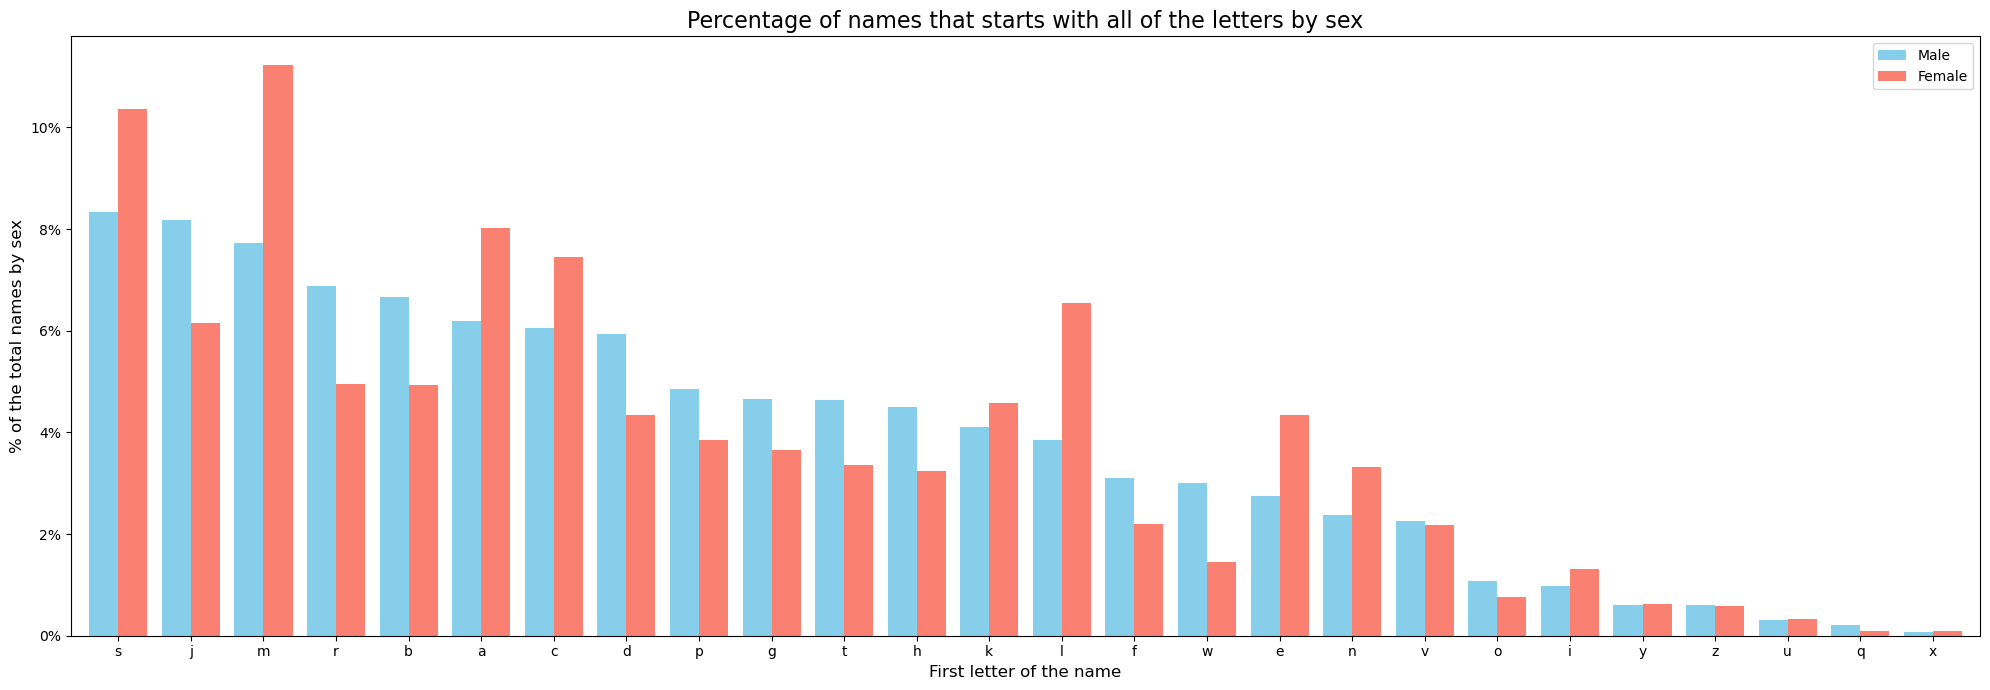

In [35]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(20, 7))

first_letter_counts.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], width=0.8)

ax.set_title('Percentage of names that starts with all of the letters by sex', fontsize=16)
ax.set_xlabel('First letter of the name', fontsize=12)
ax.set_ylabel('% of the total names by sex', fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

ax.legend(['Male', 'Female'])

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [36]:
# Analyze the last letter of each name for men and women separately
kept_names['last_letter'] = kept_names['Character_name'].apply(lambda name: name[-1].lower())
last_letter_counts_H = kept_names[kept_names['Sex'] == 'M']['last_letter'].value_counts()
last_letter_counts_F = kept_names[kept_names['Sex'] == 'F']['last_letter'].value_counts()

last_letter_counts_H_percentage = last_letter_counts_H/male_count
last_letter_counts_F_percentage = last_letter_counts_F/female_count

# Merge the two series
last_letter_counts = pd.concat([last_letter_counts_H_percentage, last_letter_counts_F_percentage], axis=1)
last_letter_counts = last_letter_counts.head(26)
last_letter_counts.columns = ['last_letter_men', 'last_letter_women']

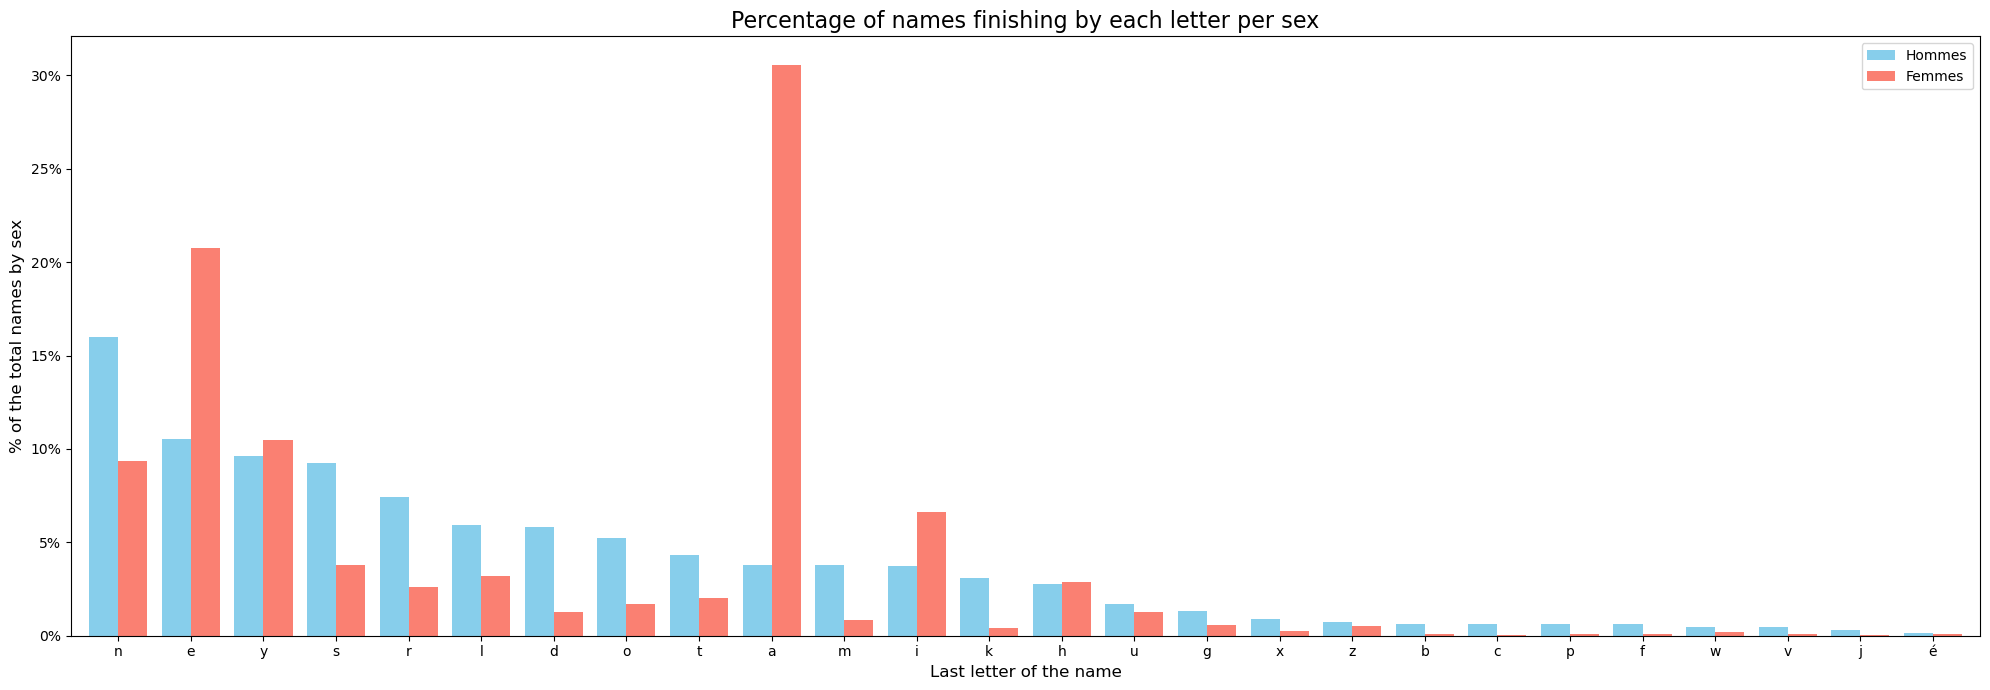

In [37]:
fig, ax = plt.subplots(figsize=(20, 7))

# Tracer les barres pour les hommes et les femmes
last_letter_counts.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], width=0.8)

# Ajouter les titres et labels
ax.set_title('Percentage of names finishing by each letter per sex', fontsize=16)
ax.set_xlabel('Last letter of the name', fontsize=12)
ax.set_ylabel('% of the total names by sex', fontsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
ax.legend(['Hommes', 'Femmes'])

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Top female/male names for each region


In [38]:
import pycountry
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        # Get the alpha-2 country code
        country_code = pycountry.countries.lookup(country_name).alpha_2
        continent_code = pc.country_alpha2_to_continent_code(country_code)

        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except (KeyError, AttributeError, LookupError):
        return None 

In [39]:
phonetic_df['primary_country'] = phonetic_df['Country'].str[0]
phonetic_df['Continent'] = phonetic_df['primary_country'].apply(country_to_continent)
phonetic_df.head(10)

continents = phonetic_df.groupby(['Continent','Sex'])['Character_name'].agg(pd.Series.mode)
df_continents = continents.to_frame().reset_index()
df_continents.columns = ['Continent', 'Sex', 'Name']
df_continents = df_continents.pivot(index='Continent',columns='Sex',values='Name').reset_index()
df_continents.columns = ['Continent', 'Female_name', 'Male_name']
df_continents.head()

,Continent,Female_name,Male_name
0,Africa,"[Amina, Elsa, Miriam, Sandra, Sarah]","[Abraham, Adel, Ahmed, Omar]"
1,Asia,Priya,Vijay
2,Europe,Anna,John
3,North America,Sarah,John
4,Oceania,Angie,John


In [40]:
# for Africa we will pick one of the names to display

df_continents.loc[0,'Female_name'] = 'Amina*'
df_continents.loc[0,'Male_name']='Omar*'

df_continents.head()

,Continent,Female_name,Male_name
0,Africa,Amina*,Omar*
1,Asia,Priya,Vijay
2,Europe,Anna,John
3,North America,Sarah,John
4,Oceania,Angie,John


In [41]:
import plotly.graph_objects as go

coordinates = {
    'Africa': (20, 0),
    'Asia': (90, 40),
    'Europe': (10, 55),
    'North America': (-100, 40),
    'South America': (-60, -15),
    'Oceania': (135, -25),
}

# Prepare data for Scattergeo
names_data = {
    'lon': [],
    'lat': [],
    'text': [],
}

df_continents['Longitude'] = df_continents['Continent'].map(lambda x: coordinates[x][0])
df_continents['Latitude'] = df_continents['Continent'].map(lambda x: coordinates[x][1])

for i, row in df_continents.iterrows():
    names_data['lon'].append(row['Longitude'])
    names_data['lat'].append(row['Latitude'] + 7)  # Slight offset for separation
    names_data['text'].append(f"♂ {row['Male_name']}")
    
    # Female name
    names_data['lon'].append(row['Longitude'])
    names_data['lat'].append(row['Latitude'] - 7)  # Slight offset for separation
    names_data['text'].append(f"♀ {row['Female_name']}")


In [42]:
fig = go.Figure(go.Scattergeo(
    lon=names_data['lon'],
    lat=names_data['lat'],
    text=names_data['text'],
    mode='text',  # Text-only mode
    textfont=dict(size=18, color="black", family="Arial")
))
fig.update_geos(projection_scale=1,center={'lat': 30})
fig.update_layout(
    geo=dict(
        projection_type="mercator",
        showland=True,
        landcolor="lightgrey",
        lakecolor="aqua",
    ),
    height=500,
    margin={"r":0,"t":5,"l":0,"b":0},
    title="Most Common Male and Female Names by Continent"
)
fig.show()

## Proportion of movies per country per continent

In [43]:
proportion_country = phonetic_df.groupby(['Continent', 'primary_country'])['primary_country'].count()
df_proportion = proportion_country.to_frame()
df_proportion.columns = ['Number_of_movies']
df_proportion = df_proportion.reset_index()
df_proportion['Prop_of_movies'] = df_proportion['Number_of_movies']/df_proportion['Continent'].sum('')
df_proportion.head(20)

ValueError: No axis named  for object type Series

In [ ]:
import plotly.express as px
fig = px.treemap(df_proportion,path=[px.Constant("world"), 'Continent', 'primary_country'],values='Number_of_movies')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

NameError: name 'df_proportion' is not defined

We can see that every sub-dataset for each continent is very unbalanced. In Asia for example 

In [44]:
from wordcloud import WordCloud
from pywaffle import Waffle

df_thriller = phonetic_df[phonetic_df['Genres'].apply(lambda genres: 'Thriller' in genres if isinstance(genres, list) else False)]

count_top_names = df_thriller['Character_name'].value_counts().head(20)
tot_top_names = count_top_names.sum()
print(tot_top_names)
count_names = df_thriller['Character_name'].value_counts().sum()
print(count_names)
number_names = len(df_thriller['Character_name'].unique())
print("tot names:",number_names)
names = count_top_names.index.tolist()
values = count_top_names.values.tolist()



2529
33244
tot names: 11067


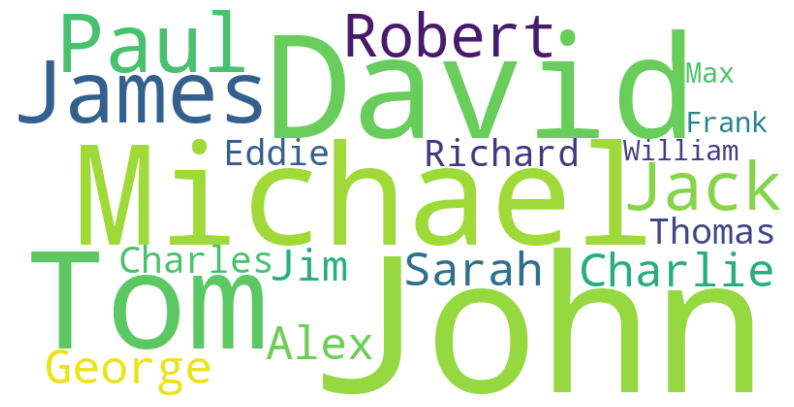

In [45]:
from wordcloud import WordCloud

# Generate a word cloud from the counts
wordcloud = WordCloud(width=800, height=400, background_color='white', prefer_horizontal=1, collocations=False).generate_from_frequencies(count_top_names)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# N-gram Analysis

In [46]:

phonetic_df['Phonetic'] = phonetic_df['Character_name'].apply(lambda x: doublemetaphone(x)[0])
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))
char_ngrams = vectorizer.fit_transform(phonetic_df['Character_name'])



In [47]:
# We create a Dataframe with the n-gram features
ngram_df = pd.DataFrame(char_ngrams.toarray(), columns=vectorizer.get_feature_names_out())
ngram_df = ngram_df.astype('float32') # converting to float32 to decrease the computing time

ngram_df.shape # We see that the dimentionality of ngram is very high, potentially increasing exponentially the processing time, we will deal with that later

(160432, 10186)

In [ ]:
#le = LabelEncoder()
#phonetic_df['origin_encoded'] = le.fit_transform(phonetic_df['Country'].str[0])
#print(phonetic_df.shape)


In [48]:
# We use minibatch kmeans clustering becease is more efficient for larger datasets
kmeans = MiniBatchKMeans(n_clusters=10, batch_size=1000, random_state=42) 
phonetic_df['cluster'] = kmeans.fit_predict(ngram_df)


Le code juste en dessous prend 5 min a run


In [49]:
# PREND 5 min A RUN

# To reduce n-gram dimentionality we use PCA
ipca = IncrementalPCA(n_components=3, batch_size=500)
pca_result = ipca.fit_transform(ngram_df)




In [50]:
loadings = pd.DataFrame(ipca.components_.T, columns=[f'PC{i+1}' for i in range(ipca.n_components_)], index=ngram_df.columns)

loadings['PC1']=loadings['PC1'].apply(abs)

print(loadings['PC1'].nlargest(10))

an     0.837175
ra     0.155166
nd     0.152878
ha     0.152112
and    0.148026
er     0.131844
na     0.118500
han    0.116221
ran    0.100093
ma     0.092794
Name: PC1, dtype: float64


En gros le n-gram decisif qui permet de séparer le plus les noms en clusters c'est "an" (et de loin). 
J'ai aucune idée de comment interpreter ca ???

## N-gram pour les pays

In [53]:
df_country = phonetic_df.copy()
df_country['pca_one'] = pca_result[:, 0]
df_country['pca_two'] = pca_result[:, 1]
df_country['pca_three'] = pca_result[:, 2]

ValueError: Could not interpret value `continent` for `hue`. An entry with this name does not appear in `data`.

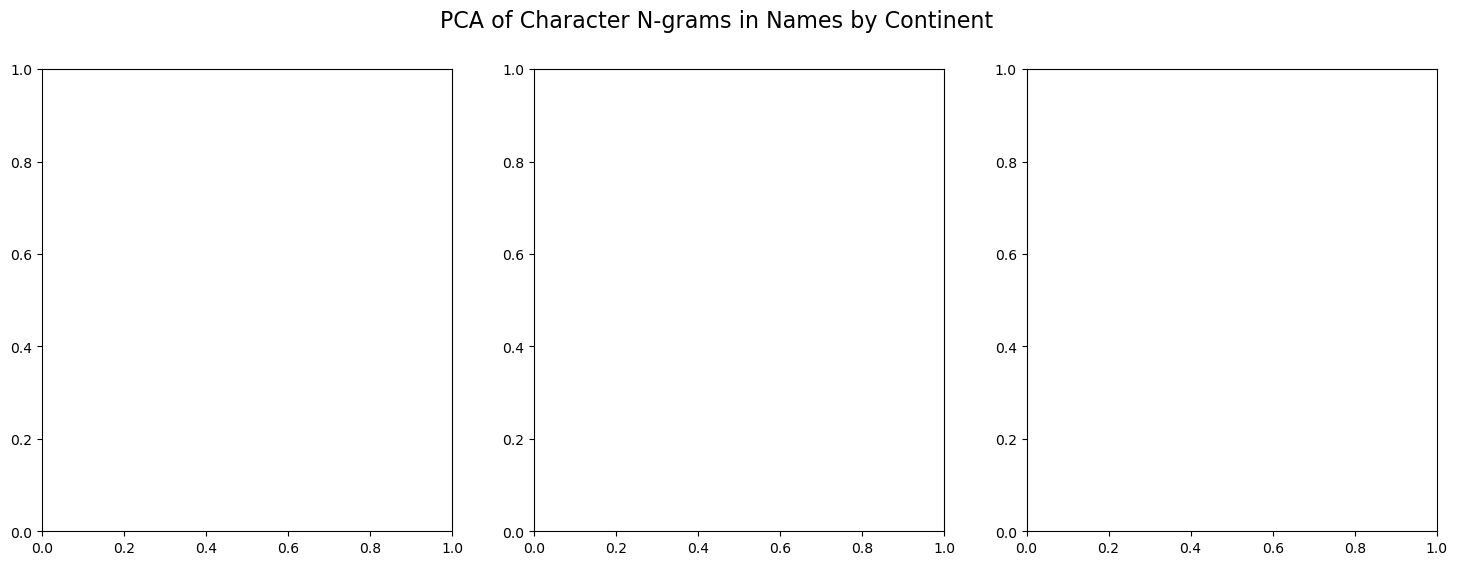

In [54]:



# Visualization
palette = ['#de324c','#f4895f','#f8e16f','#95cf92','#369acc','#9656a2']
fig,axs = plt.subplots(1,3,figsize=(18, 6))
fig.suptitle("PCA of Character N-grams in Names by Continent", fontsize=16)

sns.scatterplot(x="pca_one", y="pca_two", hue="continent", data=df_country, palette=palette, size=2,linewidth=0.3, ax=axs[0])
sns.scatterplot(x="pca_one", y="pca_three", hue="continent", data=df_country, palette=palette, size=2,linewidth=0.3, ax=axs[1])
sns.scatterplot(x="pca_two", y="pca_three", hue="continent", data=df_country, palette=palette, size=2,linewidth=0.3, ax=axs[2])
plt.title("PCA of Character N-grams in Names by Continent")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Même si y'a pas de claire division entre les continents on voit que l'Asie a des noms avec des n-grams un peu different par rapport aux autres continent

## Ngram pour les genres

In [55]:
df_genre = phonetic_df.copy()
df_genre['pca_one'] = pca_result[:, 0]
df_genre['pca_two'] = pca_result[:, 1]

In [56]:
top_genres=df_genre['Genres'].explode().value_counts().head(11)
print(top_genres)

Genres
Drama               90677
Comedy              48601
Romance Film        34544
Thriller            33244
Action              27574
Crime Fiction       22287
World cinema        17707
Adventure           17195
Indie               15799
Action/Adventure    15534
Family Film         13353
Name: count, dtype: int64


In [57]:
def top_genre_search(genres:list[str]):
    for genre in genres:
        if genre in top_genres:
            return genre         
    return 'other'
        
df_genre['top_genre'] = df_genre['Genres'].apply(top_genre_search)


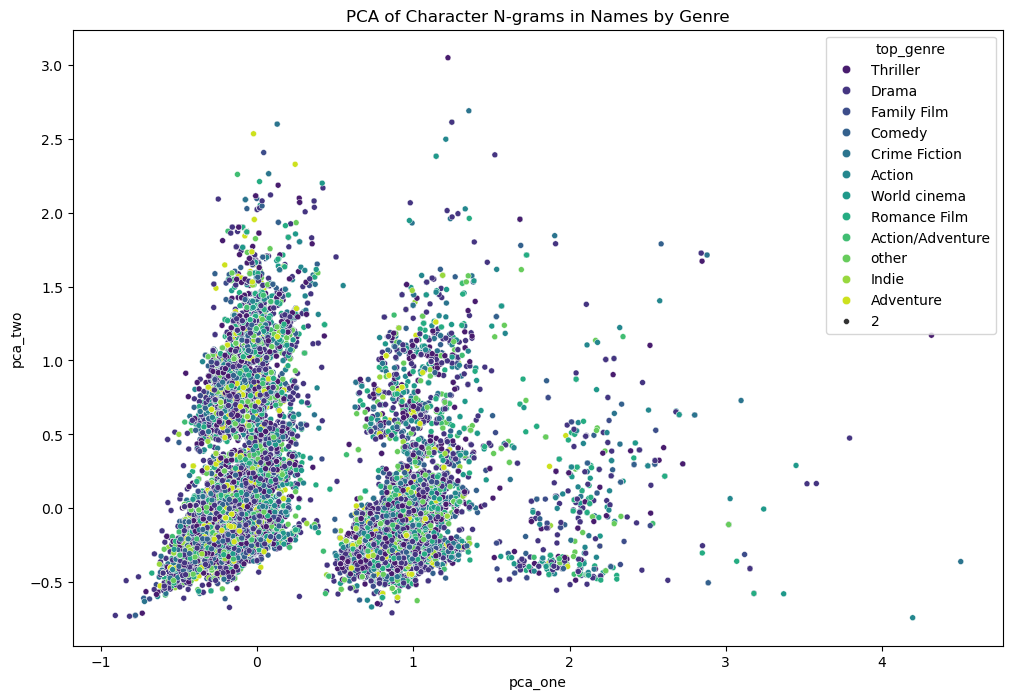

In [58]:

plt.figure(figsize=(12, 8))
sns.scatterplot(x="pca_one", y="pca_two", hue="top_genre", data=df_genre, palette="viridis", size=2,linewidth=0.3)
plt.title("PCA of Character N-grams in Names by Genre")
plt.show()

Tout est mélangé 

## Phonetics

In [64]:
phonetic_df.head()

,Wikipedia_ID,Name,Languages,Country,Genres,Character_name,Sex,Genre_Category,primary_country,Continent,Phonetic,cluster
0,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Akooshay,F,"[Action & Adventure, Horror & Thriller, Fantas...",United States of America,North America,AKX,7
1,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Melanie,F,"[Action & Adventure, Horror & Thriller, Fantas...",United States of America,North America,MLN,8
2,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Williams,M,"[Action & Adventure, Horror & Thriller, Fantas...",United States of America,North America,ALMS,7
3,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Jericho,M,"[Action & Adventure, Horror & Thriller, Fantas...",United States of America,North America,JRX,2
4,975900,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",Bashira,F,"[Action & Adventure, Horror & Thriller, Fantas...",United States of America,North America,PXR,7


In [71]:
from fuzzy import DMetaphone

# Initialize Double Metaphone instance
dmeta = DMetaphone()

# Function to generate codes for each name
def get_dmetaphone_code(name):
    name = str(name)  # Ensure name is handled as Unicode
    codes = dmeta(name)
    return codes[0], codes[1]  # primary and secondary codes

# List of names
names = phonetic_df['Character_name'].tolist()

print(names[2])

# Dictionary to store names and their Double Metaphone codes
#name_codes = {name: get_dmetaphone_code(name) for name in names}

# Function to find matching names based on Double Metaphone codes
def find_similar_names(input_name):
    input_codes = get_dmetaphone_code(input_name)
    similar_names = [
        name for name, codes in name_codes.items()
        if input_codes[0] == codes[0] or input_codes[1] == codes[1]
    ]
    return similar_names




Williams
